# Import Required Libraries for data handling and analysis 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing required packages for -

In [4]:
#1 preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

#2 modeling algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier


#3 model building
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve,auc

# Elementary Data Analysis(EDA)

In [5]:
#data Extraction
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\HCL PT DATASET.csv")

In [6]:
#displaying first five rows
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 34,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,0,8,0,1,6,4,0,5,NaN,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,1,10,3,3,10,7,1,7,NaN,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,0,7,3,3,0,0,0,0,NaN,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,0,8,3,3,8,7,3,0,NaN,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,1,6,3,3,2,2,2,2,NaN,No


In [7]:
#display the numbver of rows and columns
data.shape

(1470, 36)

In [8]:
#check if missing values are present
#to display boolean values for missing values.

data.isnull().sum()

Age                            0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked             0
Over18                         0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBalance                0
YearsAtCom

In [9]:
#displaying the count of 'yes' and 'no values of the target variables
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

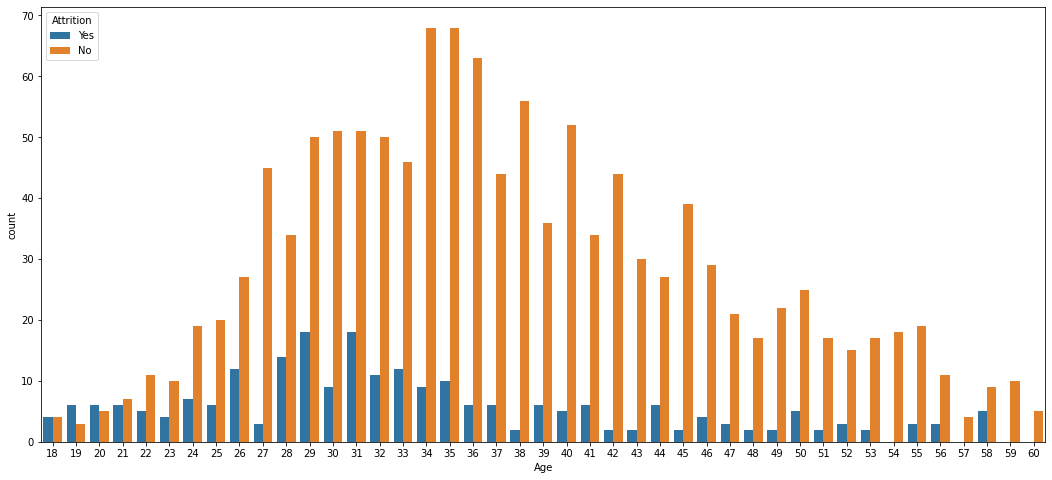

In [10]:
#correlation of attrition with some important features

#Attrition vs Age
fig=plt.figure(figsize=(18,8))
sns.countplot(x='Age',hue='Attrition',data=data)
plt.show()

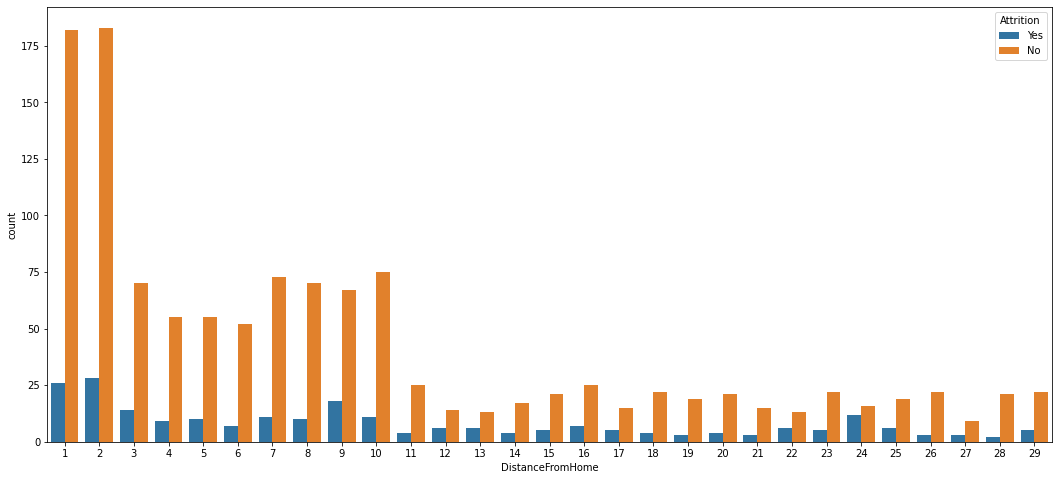

In [11]:
#Attrition vs Distance from home
fig=plt.figure(figsize=(18,8))
sns.countplot(x='DistanceFromHome',hue='Attrition',data=data)
plt.show()

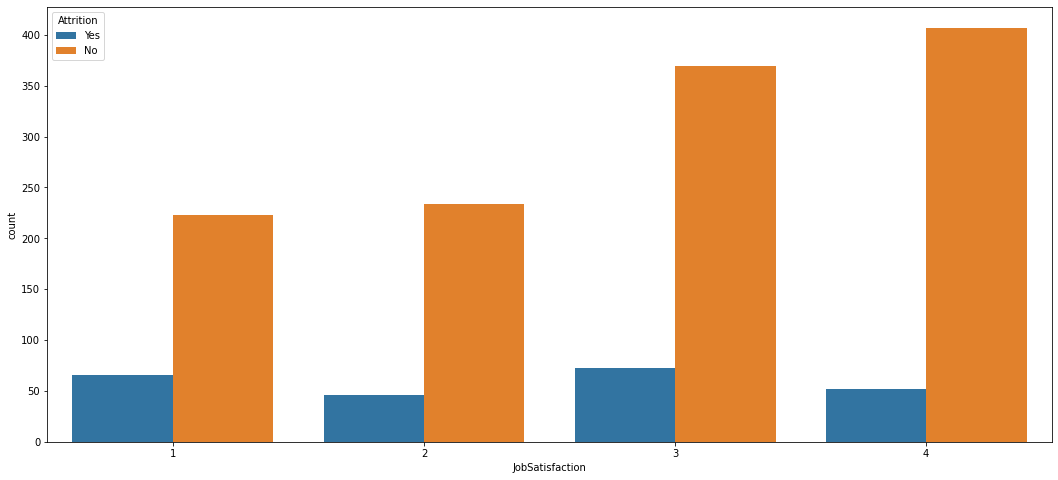

In [12]:
#Attrition vs JobSatisfaction
fig=plt.figure(figsize=(18,8))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=data)
plt.show()


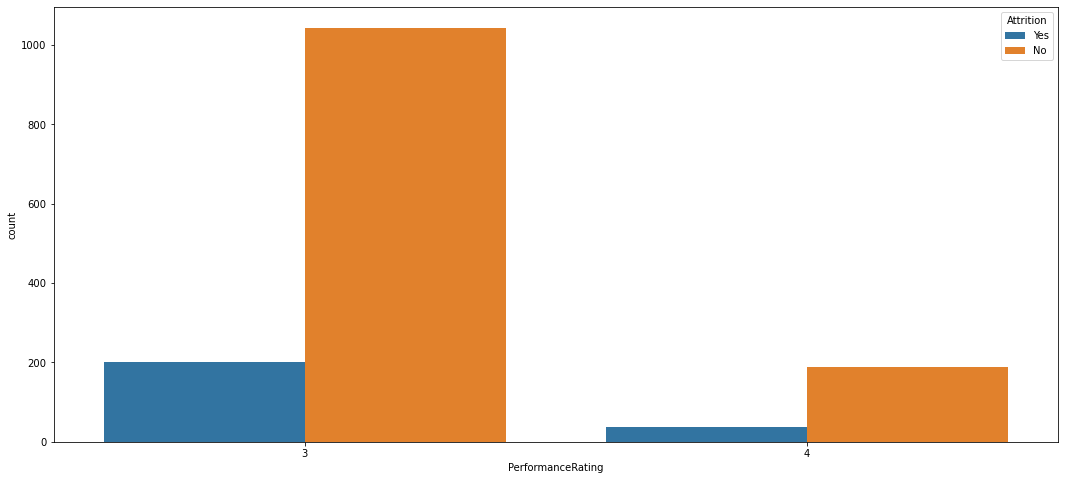

In [13]:
#Attrition vs Performance Rating
fig=plt.figure(figsize=(18,8))
sns.countplot(x='PerformanceRating',hue='Attrition',data=data)
plt.show()

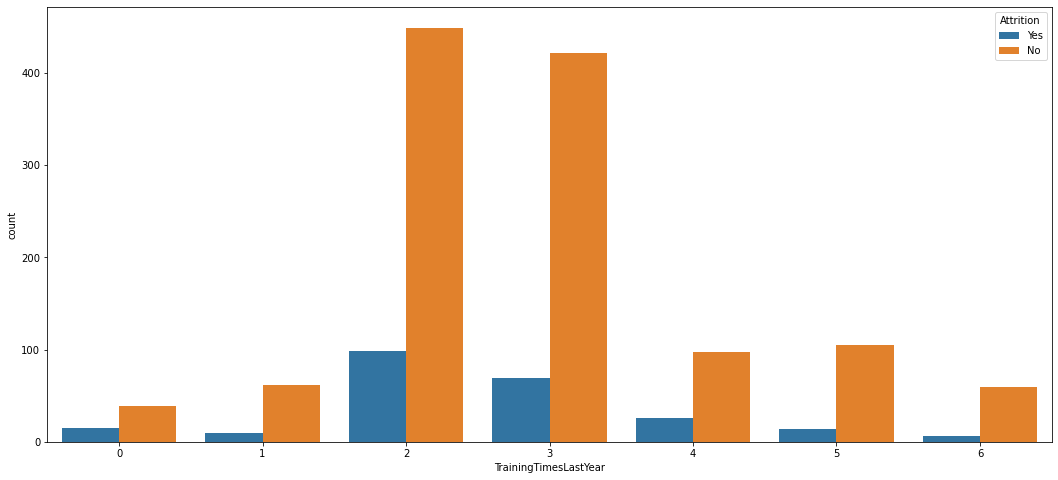

In [14]:
#Attrition vs TrainingTimesLastYear
fig=plt.figure(figsize=(18,8))
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=data)
plt.show()

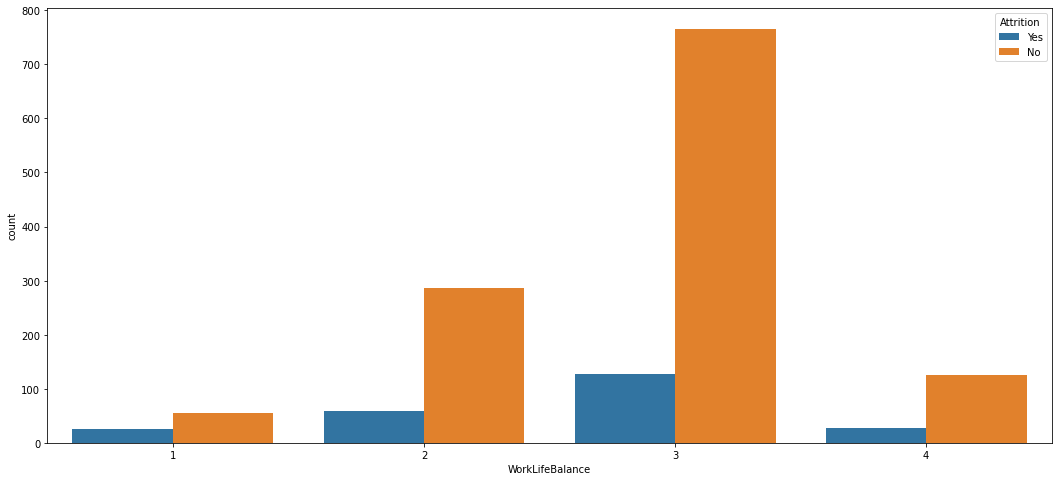

In [15]:
#Attrition vs WorkLifeBalance
fig=plt.figure(figsize=(18,8))
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=data)
plt.show()

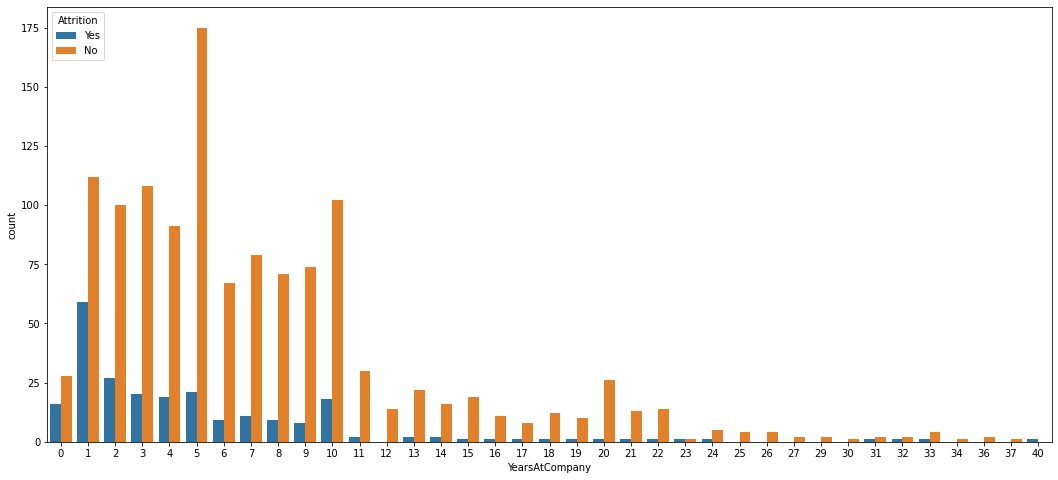

In [16]:
#Attrition vs YearsAtCompany
fig=plt.figure(figsize=(18,8))
sns.countplot(x='YearsAtCompany',hue='Attrition',data=data)
plt.show()

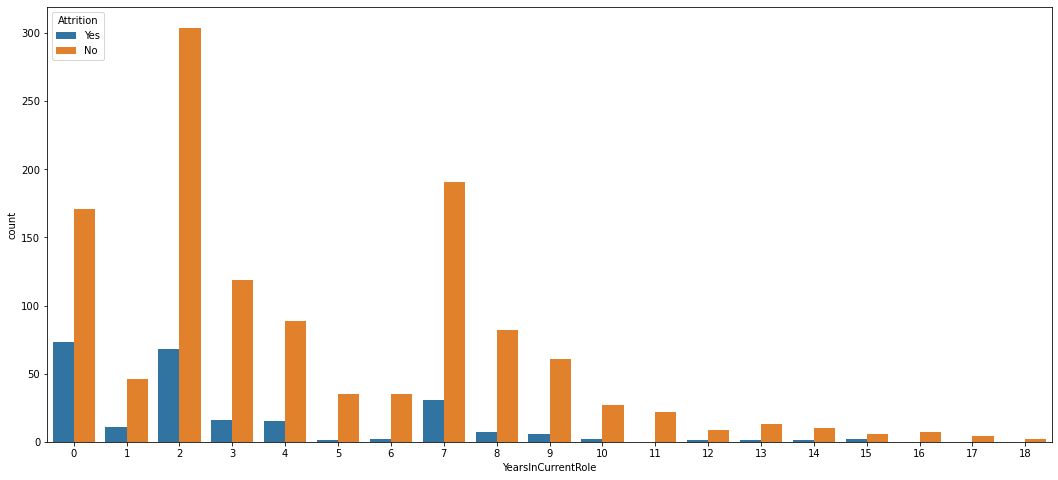

In [17]:
#Attrition vs YearsInCurrentRole
fig=plt.figure(figsize=(18,8))
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=data)
plt.show()

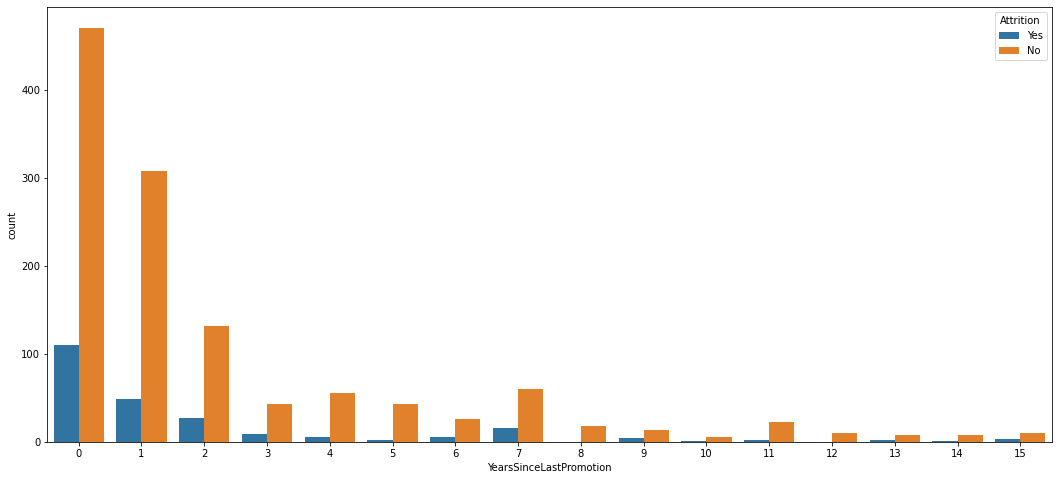

In [18]:
#Attrition vs YearsSinceLastPromotion
fig=plt.figure(figsize=(18,8))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=data)
plt.show()

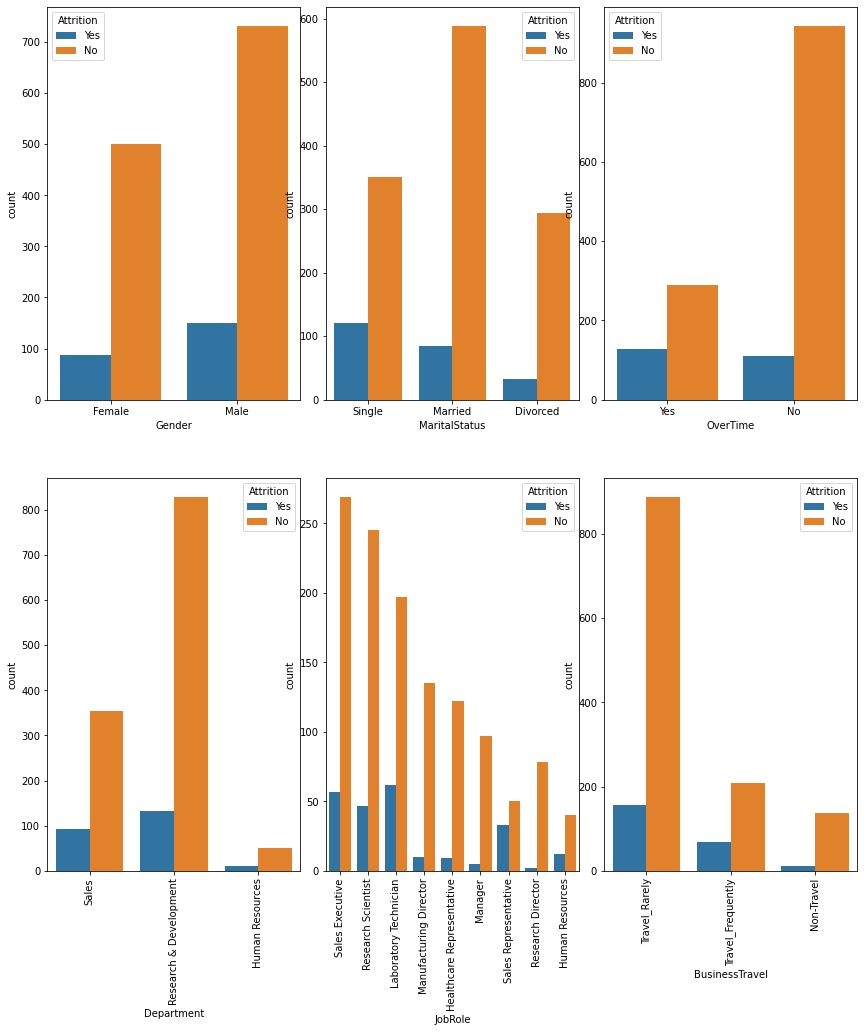

In [19]:
#Attrition vs categorical Variables
total_records=len(data)
columns=['Gender','MaritalStatus','OverTime','Department','JobRole','BusinessTravel']
j=0
for i in columns:
    j +=1
    plt.subplot(2,3,j)
    ax1 = sns.countplot(data=data,x=i,hue="Attrition")
    if(j==4 or j==5 or j==6):
        plt.xticks(rotation=90)
        
plt.subplots_adjust(bottom=1, top=4, right=2.0, wspace=0.1)
plt.show()

# Data Preprocessing

In [20]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [31]:
def preprocess_input(df):
    df=df.copy()
    
    # drop single value columns and id values
    df=df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours','Unnamed: 34'],axis=1)
    #correlation matrix
    sns.heatmap(df.corr())
    
    #Binary_encode binary columns
    df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
    df['OverTime']=df['OverTime'].replace({'No':0,'Yes':1})
    df['Attrition']=df['Attrition'].replace({'No':0,'Yes':1})
    #Ordinal_encode the BusinessTravel Column
    df['BusinessTravel']=df['BusinessTravel'].replace({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0})
    #Onehot_encoding
    for column in ['Department','EducationField','JobRole','MaritalStatus']:
        df=onehot_encode(df,column=column)
        
    #split df into X and Y
    y=df['Attrition']
    x=df.drop('Attrition',axis =1)
    
    # Train-tast split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=1)
    
    #scale x
    scaler=StandardScaler()
    scaler.fit(x_test)
    x_train=pd.DataFrame(scaler.transform(x_train),index=x_train.index,columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x_test.columns)
    
    return x_train , x_test , y_train , y_test

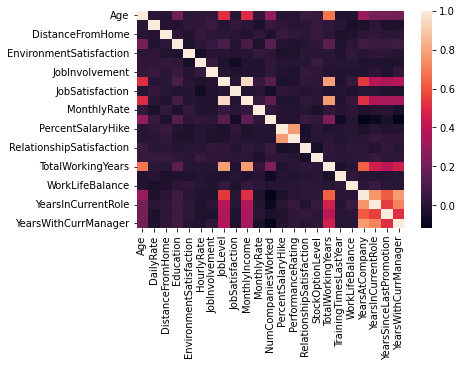

In [32]:
x_train , x_test , y_train , y_test=preprocess_input(data)

In [146]:
x_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
99,0.804838,-2.133988,-0.688884,1.620836,0.067321,-0.639958,0.754583,0.051667,0.369115,-0.045297,...,2.245238,-0.311472,-0.320156,-0.200236,-0.502833,-0.534522,-0.260378,-0.545031,1.087735,-0.674867
785,0.362001,-0.213399,1.862179,1.263024,1.025017,-1.550350,0.754583,-0.242336,0.369115,0.862695,...,-0.445387,-0.311472,-0.320156,-0.200236,-0.502833,-0.534522,-0.260378,-0.545031,1.087735,-0.674867
918,1.579801,1.707190,-1.329829,-0.048952,0.067321,1.180826,0.754583,0.835678,0.369115,2.678679,...,-0.445387,3.210560,-0.320156,-0.200236,-0.502833,-0.534522,-0.260378,1.834758,-0.919341,-0.674867
1335,0.251292,-0.213399,0.191144,1.143754,1.025017,1.180826,0.754583,-1.222349,0.369115,-0.045297,...,-0.445387,-0.311472,-0.320156,-0.200236,1.988732,-0.534522,-0.260378,1.834758,-0.919341,-0.674867
1182,-0.080835,-2.133988,0.341206,-1.003117,1.025017,1.180826,-1.325236,-1.614354,-1.097369,-0.045297,...,-0.445387,-0.311472,3.123475,-0.200236,-0.502833,-0.534522,-0.260378,-0.545031,1.087735,-0.674867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.412963,1.707190,0.170796,-1.003117,1.025017,0.270434,-1.325236,0.884678,1.835600,-0.045297,...,-0.445387,-0.311472,-0.320156,-0.200236,-0.502833,-0.534522,-0.260378,-0.545031,1.087735,-0.674867
905,-0.855799,-0.213399,-0.167480,-1.003117,0.067321,1.180826,-1.325236,1.031680,-1.097369,1.770687,...,-0.445387,-0.311472,-0.320156,4.994114,-0.502833,-0.534522,-0.260378,1.834758,-0.919341,-0.674867
1096,0.362001,-0.213399,0.351380,-0.406764,-0.890375,0.270434,0.754583,-1.369351,0.369115,1.770687,...,-0.445387,3.210560,-0.320156,-0.200236,-0.502833,-0.534522,-0.260378,-0.545031,-0.919341,1.481773
235,0.694129,-0.213399,0.697287,0.785942,0.067321,1.180826,-1.325236,0.688676,0.369115,1.770687,...,-0.445387,3.210560,-0.320156,-0.200236,-0.502833,-0.534522,-0.260378,-0.545031,1.087735,-0.674867


In [147]:
y_train

99      0
785     0
918     0
1335    0
1182    0
       ..
715     0
905     0
1096    0
235     0
1061    0
Name: Attrition, Length: 1029, dtype: int64

# Model Evaluation

In [153]:
models= {
    "Logistic Regression":LogisticRegression(),
    "k-Nearest Neighbors":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Support Vector Machine(Linear Kernal)": LinearSVC(),
    "Support Vector Machine(RBF Kernal)": SVC(),
    "Nureal Network":MLPClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gredient Boosting":GradientBoostingClassifier()
}
for name, model in models.items():
    model.fit(x_train,y_train)
    print(name+': trained')

Logistic Regression: trained
k-Nearest Neighbors: trained
Decision Tree: trained
Support Vector Machine(Linear Kernal): trained
Support Vector Machine(RBF Kernal): trained


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Nureal Network: trained
Random Forest: trained
Gredient Boosting: trained


# Model Deployment

In [152]:
for name , model in models.items():
    print(name+ ": {:.2f}%".format(model.score(x_test,y_test)*100))

Logistic Regression: 86.62%
k-Nearest Neighbors: 82.77%
Decision Tree: 77.32%
Support Vector Machine(Linear Kernal): 85.71%
Support Vector Machine(RBF Kernal): 84.81%
Nureal Network: 83.67%
Random Forest: 84.13%
Gredient Boosting: 85.26%
